# In this file, you can find the code for implementation of contrast stretching using matplotlib.
#### We are also going to visualize and compare the histograms of original and contrast-stretched image.

#### 1. Import the required libraries

In [4]:
from cv2 import cv2
import numpy as np
import matplotlib.pyplot as plt

#### 2. load the image into variable called img and resize it

In [5]:
img = cv2.imread('flower.jpeg')
# resizing the image to our desired resolution
img = cv2.resize(img, (600,400))
# with the help of .shape, we can view the dimensions of the image.
img.shape

(400, 600, 3)

#### 3. Convert the image into gray image. Also set its contrast and brightness parameters.

In [6]:
# cv2 converts the RGB image to binary image. 
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# increasing the contrast value by alpha and brightening the image by beta
gray_img = cv2.convertScaleAbs(gray_img, alpha=1.10, beta=40)

#### 4. Display the original image.

In [7]:
# unstretched image
cv2.imshow('original image', gray_img)
# after the image, to continue press any key.
cv2.waitKey(0)

13

#### 5. Define a function to plot histogram of an image.

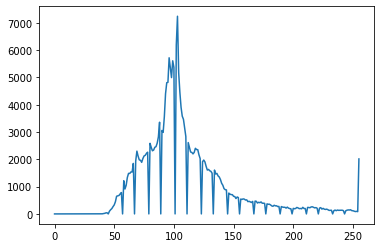

In [8]:
# Histogram of original image

# this function will return the pixel value ranging from 0-255
def hist(image):
    h = np.zeros(shape=(256,1))
    s = image.shape
    for i in range(s[0]):
        for j in range(s[1]):
            k = image[i,j]
            h[k,0] = h[k,0] + 1
    return h
histg = hist(gray_img)
plt.plot(histg)
plt.show()

#### 6. Modify the pixel values by applying image normalization formula to get a contrast stretched image.

In [9]:
# Stretching Code:

x = histg.reshape(1,256)
# creating a zero-array consisting of 255 bits.
y = np.zeros((1,256))
# storing the dimensions of original gray image into variable 's'
s = gray_img.shape
# retrieving x-values into y. 
for i in range(256):
    if x[0,i] == 0:
        y[0,i] = 0
    else:
        y[0,i] = i

# extracting min and max pixel values from y.
min_ = np.min(y[np.nonzero(y)])
max_ = np.max(y[np.nonzero(y)])

# applying the image normalization formula
stretch = np.round(((255-0)/(max_-min_))*(y-min_))
stretch[stretch<0] = 0
stretch[stretch>255] = 255

# modifying the pixel values of original gray image.
for i in range(s[0]):
    for j in range(s[1]):
        k = gray_img[i,j]
        gray_img[i,j] = stretch[0,k]

#### 7. Display the histogram of the contrast-stretched image. 

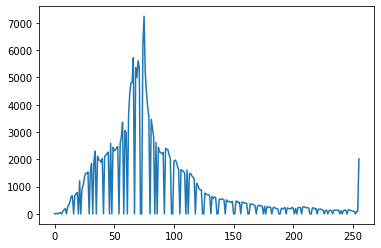

In [10]:
# histogram of stretched image
histg2 = hist(gray_img)
plt.plot(histg2)
plt.show()

#### 8. Display stretched image.

In [11]:
# stretched image
cv2.imshow('Stretched Image: ', gray_img)
# after the image, to continue press any key.
cv2.waitKey(0)

13

## Summary:
#### Here, we used matplotlib, cv2 and numpy libraries.
#### We used cv2 library to convert RGB image to binary image.
#### With the help of cv2, we also set the brightness(beta) and contrast parameters(alpha)
#### We used numpy library to modify the pixel values by applying normalization formula.
#### Matplotlib was used to plot the histogram of both original and contrast-stretched image.